In [1]:
# Base packages
import os
import numpy as np
import pandas as pd
import json

# Web scraping
from bs4 import BeautifulSoup
import requests

# Misc
from tqdm import tqdm

# Web scraping and data cleaning

After investigating https://www.climate-laws.org/ with Edge's Developer Console, I've found out that the website's React app gets its JSON data from this link https://www.climate-laws.org/legislation_and_policies.json?offset=[offset]. This will allow me to batch request the data straight from the website's back-end, instead of scraping and cleaning static HTML files.

In [2]:
# Function to request data
def request_climate_laws_data(offset_batch=np.arange(10, 2100, 10)):
    """
    Get online Climate Laws data from climate-laws.org, and process it into DataFrame
    """
    climate_laws_df = pd.DataFrame()
    for offset in tqdm(offset_batch):
        climate_laws_url = f"https://www.climate-laws.org/legislation_and_policies.json?offset={offset}"
        climate_laws_data = requests.get(climate_laws_url)
        climate_laws_df = climate_laws_df.append(climate_laws_data.json()["items"])
    return climate_laws_df.reset_index()

In [3]:
climate_laws_df = request_climate_laws_data(np.arange(10, 2100, 10))

100%|████████████████████████████████████████████████████████████████████████████████| 209/209 [00:44<00:00,  4.69it/s]


In [4]:
# Exploring dataset
print(f"Data shape: {climate_laws_df.shape}")
print(f"Columns:\n{climate_laws_df.columns}")
climate_laws_df.head()

Data shape: (2084, 23)
Columns:
Index(['index', 'id', 'title', 'description', 'law_id', 'slug', 'geography_id',
       'created_at', 'updated_at', 'visibility_status', 'created_by_id',
       'updated_by_id', 'discarded_at', 'legislation_type', 'parent_id',
       'date', 'link', 'short_description', 'geography', 'date_passed',
       'last_change', 'legislation_type_humanize', 'geography_path'],
      dtype='object')


,index,id,title,description,law_id,slug,geography_id,created_at,updated_at,visibility_status,...,legislation_type,parent_id,date,link,short_description,geography,date_passed,last_change,legislation_type_humanize,geography_path
0,0,9737,Plan to Control Illegal Deforestation and Reco...,<div>This plan aims to continuously and consis...,None,plan-to-control-illegal-deforestation-and-reco...,24,2020-11-17T13:43:31.244Z,2020-11-17T13:51:05.342Z,published,...,executive,NaN,2020-10-25,"<a href=""/geographies/brazil/policies/plan-to-...",This plan aims to continuously and consistentl...,"{'id': 24, 'geography_type': 'national', 'iso'...",2004,"October, 2020",Executive,/geographies/brazil
1,1,9740,Institutional Program of the National Institut...,<div>The agreement that creates the Institutio...,None,institutional-program-of-the-national-institut...,114,2020-12-04T17:29:29.757Z,2020-12-04T17:33:08.878Z,published,...,executive,NaN,2020-10-16,"<a href=""/geographies/mexico/policies/institut...",The agreement that creates the Institutional P...,"{'id': 114, 'geography_type': 'national', 'iso...",2020,None,Executive,/geographies/mexico
2,2,1657,Electricity Utility Act,<div>The Electricity Business Law mandates bot...,None,electricity-utility-act,166,2019-12-08T17:46:16.862Z,2020-06-29T15:45:25.525Z,published,...,legislative,NaN,2020-10-01,"<a href=""/geographies/south-korea/laws/electri...",The Electricity Business Law mandates both the...,"{'id': 166, 'geography_type': 'national', 'iso...",1990,"October, 2020",Legislative,/geographies/south-korea
3,3,9732,Circular No. 25/2020 / TT-BCT on the implement...,<div>This circular was adopted by the Minister...,None,circular-no-25-2020-tt-bct-on-the-implementati...,197,2020-10-31T13:46:44.180Z,2020-10-31T13:46:44.180Z,published,...,executive,NaN,2020-09-29,"<a href=""/geographies/vietnam/policies/circula...",This circular was adopted by the Minister of I...,"{'id': 197, 'geography_type': 'national', 'iso...",2020,None,Executive,/geographies/vietnam
4,4,9728,Framework law for the use and promotion of bic...,<div>The main objective of this law is to gene...,None,framework-law-for-the-use-and-promotion-of-bic...,54,2020-10-26T21:17:32.493Z,2020-10-29T16:08:05.326Z,published,...,legislative,NaN,2020-09-25,"<a href=""/geographies/el-salvador/laws/framewo...",The main objective of this law is to generate ...,"{'id': 54, 'geography_type': 'national', 'iso'...",2020,None,Legislative,/geographies/el-salvador


In [6]:
from datetime import datetime

# Saving data to use later, instead of requesting from server
os.makedirs("./climate_laws_data", exist_ok=True)
timestamp = datetime.now().strftime("%Y.%m.%d_%H.%M.%S")

climate_laws_df.to_excel(f"./climate_laws_data/{timestamp}_climate_laws_data.xlsx", index=False)

### EDA and data cleaning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ZH834BT\AppData\Local\Continuum\anaconda3_python\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


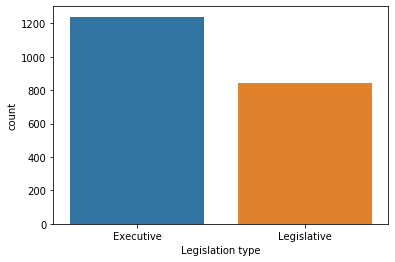

In [11]:
# Types of legislation
legislation_type_plot = sns.countplot(x="legislation_type_humanize", data=climate_laws_df)
plt.xlabel("Legislation type")
plt.show()